In [3]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [31]:
batch_size = 32
learning_rate = 1e-3
num_epochs = 100

In [28]:
train_dataset = datasets.MNIST('./datas', train=True, transform=transforms.ToTensor()) #, download=True)
test_dataset = datasets.MNIST('./datas', train=False, transform=transforms.ToTensor())

train_dataload = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataload = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [20]:
class LogsticRegression(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LogsticRegression, self).__init__()
        
        self.logstic = nn.Linear(in_dim, out_dim)
    
    def forward(self, x):
        return self.logstic(x)

In [45]:
model  = LogsticRegression(28*28, 10).cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
train_accs = []

eval_losses = []
eval_accs = []

In [46]:
for epoch in range(num_epochs):
    running_loss = .0
    running_acc = .0
    for i, data in enumerate(train_dataload, 1):
        img, label = data

        img = img.view(img.size(0), -1).cuda()
        label = label.cuda()

        out = model(img)
        loss = criterion(out, label)
        running_loss += loss.item() * batch_size
        
        _, pred = torch.max(out, 1)
        running_acc += (pred == label).sum().item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 500 == 0:
            print 'Epoch:[{}/{}], loss: {:.6f}, acc: {:.6f}'.format(epoch+1, \
                                                                    num_epochs, \
                                                                    running_loss/(batch_size*i), \
                                                                    running_acc/(batch_size*i))
    print 'Finish {} epoch, loss: {:.6f}, acc: {:.6f}'.format(epoch+1, \
                                                             running_loss/len(train_dataset), \
                                                             running_acc/len(train_dataset))
    
    train_losses.append(running_loss/len(train_dataset))
    train_accs.append(running_acc/len(train_dataset))
    
#     model.eval()
    eval_loss = .0
    eval_acc = .0
    for data in test_dataload:
        img, label = data
        img = img.view(img.size(0), -1).cuda()
        label = label.cuda()
        
        out = model(img)
        loss = criterion(out, label)
        eval_loss += loss.item() * batch_size
        _, pred = torch.max(out, 1)
        eval_acc += (pred == label).sum().item()
        
    print 'Test Loss: {:.6f}, Test Acc: {:.6f}'.format(eval_loss/len(test_dataset), \
                                                      eval_acc/len(test_dataset))
    eval_losses.append(eval_loss/len(test_dataset))
    eval_accs.append(eval_acc/len(test_dataset))



Epoch:[1/5], loss: 0.732518, acc: 0.835187
Epoch:[1/5], loss: 0.567356, acc: 0.864281
Epoch:[1/5], loss: 0.491923, acc: 0.877979
Finish 1 epoch, loss: 0.459475, acc: 0.884017
Test Loss: 0.305856, Test Acc: 0.915300
Epoch:[2/5], loss: 0.312288, acc: 0.915063
Epoch:[2/5], loss: 0.305222, acc: 0.916469
Epoch:[2/5], loss: 0.301730, acc: 0.916646
Finish 2 epoch, loss: 0.302398, acc: 0.915633
Test Loss: 0.281567, Test Acc: 0.920300
Epoch:[3/5], loss: 0.288861, acc: 0.917875
Epoch:[3/5], loss: 0.283855, acc: 0.920562
Epoch:[3/5], loss: 0.283753, acc: 0.920438
Finish 3 epoch, loss: 0.282969, acc: 0.920900
Test Loss: 0.272401, Test Acc: 0.923900
Epoch:[4/5], loss: 0.277531, acc: 0.923125
Epoch:[4/5], loss: 0.274984, acc: 0.924438
Epoch:[4/5], loss: 0.271718, acc: 0.924500
Finish 4 epoch, loss: 0.272725, acc: 0.924400
Test Loss: 0.266591, Test Acc: 0.926600
Epoch:[5/5], loss: 0.273222, acc: 0.926375
Epoch:[5/5], loss: 0.264238, acc: 0.927312
Epoch:[5/5], loss: 0.265480, acc: 0.926417
Finish 5 ep

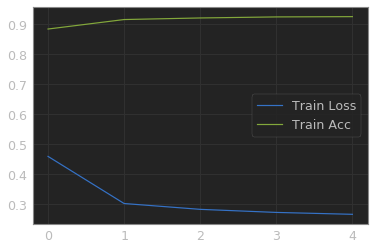

In [48]:
plt.plot(train_losses, label='Train Loss')
plt.plot(train_accs, label='Train Acc')
plt.legend()
plt.show()

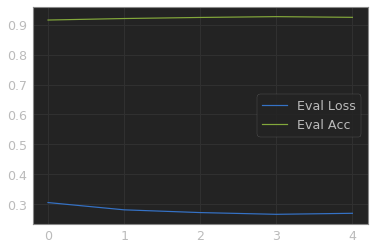

In [50]:
plt.plot(eval_losses, label='Eval Loss')
plt.plot(eval_accs, label='Eval Acc')
plt.legend()
plt.show()

In [41]:
torch.save(model.state_dict(), './ser/logstic.pth')